In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#import sheets
file_path = 'D:\E-commerce_Project\E-commerce_data.xlsx' 


customers = pd.read_excel(file_path, sheet_name='customers')
genders = pd.read_excel(file_path, sheet_name='genders')
cities = pd.read_excel(file_path, sheet_name='cities')
transactions = pd.read_excel(file_path, sheet_name='transactions')
branches = pd.read_excel(file_path, sheet_name='branches')
merchants = pd.read_excel(file_path, sheet_name='merchants')


In [4]:
# Merge Sheets To one File 
merged_data = pd.merge(transactions, customers, how='left', on='customer_id')

merged_data = pd.merge(merged_data, genders, how='left', on='gender_id')

merged_data = pd.merge(merged_data, cities, how='left', on='city_id')

merged_data = pd.merge(merged_data, branches, how='left', on='branch_id')

merged_data = pd.merge(merged_data, merchants, how='left', on='merchant_id')

print(merged_data.head())

   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  join_date  city_id  gender_id  \
0     uNY-568        NaT          7 2023-05-16       15          2   
1     kBx-219 2023-06-04          5 2022-10-10       14          2   
2     PLG-122        NaT          7 2022-05-30        2          1   
3     Wzf-897        NaT          2 2023-11-27       15          2   
4     qGb-428 2022-11-20          6 2021-09-04       14          1   

  gender_name   city_name  merchant_id                   merchant_name  
0      Female       Aswan            7                  Berry-Anderson  
1      Femal

In [5]:
# Rename File
data = merged_data
data.head(10)

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez
5,6,307,2023-01-01,subscribed,gke-047,NaT,8,2021-12-20,2,1,Male,Alexandria,20,Griffin-Leblanc
6,7,812,2024-03-02,burned,Xrl-052,2024-03-19,1,2023-10-27,8,1,Male,El-Mahalla El-Kubra,11,"Smith, Lawson and Hernandez"
7,8,594,2024-04-23,burned,ogZ-906,2024-07-17,4,2024-01-30,3,1,Male,Giza,15,Butler-Gomez
8,9,966,2023-04-12,burned,dwn-619,2023-05-19,1,2022-10-13,12,1,Male,Fayyum,11,"Smith, Lawson and Hernandez"
9,10,914,2023-03-17,burned,Wjs-081,2023-04-22,1,2022-12-09,20,2,Female,Sohag,11,"Smith, Lawson and Hernandez"


# EDA

In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
join_date                0
city_id                  0
gender_id                0
gender_name              0
city_name                0
merchant_id              0
merchant_name            0
dtype: int64


In [7]:
# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       transaction_id  customer_id    branch_id      city_id   gender_id  \
count     5000.000000  5000.000000  5000.000000  5000.000000  5000.00000   
mean      2500.500000   509.551600     5.529800    10.091800     1.48660   
std       1443.520003   287.065172     2.895788     5.860703     0.49987   
min          1.000000     1.000000     1.000000     1.000000     1.00000   
25%       1250.750000   262.000000     3.000000     5.000000     1.00000   
50%       2500.500000   514.000000     6.000000    10.000000     1.00000   
75%       3750.250000   758.000000     8.000000    15.000000     2.00000   
max       5000.000000  1000.000000    10.000000    20.000000     2.00000   

       merchant_id  
count  5000.000000  
mean     12.882600  
std       4.000452  
min       7.000000  
25%       9.000000  
50%      13.000000  
75%      15.000000  
max      20.000000  


In [8]:
# Merchant Activity (Number of Transactions per Merchant)
merchant_activity = data['merchant_name'].value_counts()
print("\nMerchant Activity (Number of Transactions):\n", merchant_activity)


Merchant Activity (Number of Transactions):
 Thomas-Nelson                     1032
Butler-Gomez                      1001
Smith, Lawson and Hernandez        527
Berry-Anderson                     496
Griffin-Leblanc                    496
Campbell, Shaffer and Martinez     489
Medina-Foster                      487
Lewis LLC                          472
Name: merchant_name, dtype: int64


In [9]:
# Average Number of Transactions per Customer
avg_transactions_per_customer = data.groupby('customer_id').size().mean()
print("\nAverage Number of Transactions per Customer:\n", avg_transactions_per_customer)


Average Number of Transactions per Customer:
 5.055611729019211


In [10]:
# Coupon Burn Rate (ratio of burned to subscribed)
burned_coupons = data[data['transaction_status'] == 'burned'].shape[0]
subscribed_coupons = data[data['transaction_status'] == 'subscribed'].shape[0]
coupon_burn_rate = burned_coupons / subscribed_coupons if subscribed_coupons > 0 else 0
print("\nCoupon Burn Rate (burned/subscribed):\n", coupon_burn_rate)


Coupon Burn Rate (burned/subscribed):
 1.0128824476650564


In [11]:
# Most Active Cities by Transactions
active_cities_by_transactions = data['city_name'].value_counts()
print("\nMost Active Cities by Transactions:\n", active_cities_by_transactions)


Most Active Cities by Transactions:
 Cairo                  337
Port Said              321
Aswan                  298
Giza                   291
Fayyum                 272
Qena                   263
Damanhur               263
El-Mahalla El-Kubra    263
Shubra El-Kheima       259
Suez                   247
Alexandria             242
Ismailia               237
Asyut                  231
Minya                  225
Sohag                  224
Zagazig                214
Mansoura               213
Damietta               211
Tanta                  210
Beni Suef              179
Name: city_name, dtype: int64


In [12]:
# Transactions by Branch
transactions_by_branch = data['branch_id'].value_counts()
print("\nTransactions by Branch:\n", transactions_by_branch)


Transactions by Branch:
 1     527
10    526
6     507
9     506
7     496
8     496
4     494
5     489
3     487
2     472
Name: branch_id, dtype: int64


In [13]:
# Transaction Trends over Time (monthly)
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transaction_trends = transactions.groupby(transactions['transaction_date'].dt.to_period('M')).size()
print("\nTransaction Trends (Monthly):\n", transaction_trends)



Transaction Trends (Monthly):
 transaction_date
2021-08      3
2021-09      9
2021-10     10
2021-11     18
2021-12     17
2022-01     22
2022-02     26
2022-03     27
2022-04     39
2022-05     50
2022-06     48
2022-07     56
2022-08     57
2022-09     78
2022-10     79
2022-11     81
2022-12     72
2023-01    104
2023-02    115
2023-03    106
2023-04    105
2023-05    128
2023-06    151
2023-07    148
2023-08    161
2023-09    159
2023-10    204
2023-11    201
2023-12    209
2024-01    256
2024-02    249
2024-03    320
2024-04    345
2024-05    417
2024-06    540
2024-07    390
Freq: M, dtype: int64


In [14]:
# Transactions over Time (Yearly)
transaction_trends_yearly = transactions.groupby(transactions['transaction_date'].dt.to_period('Y')).size()
print("\nTransaction Trends (Yearly):\n", transaction_trends_yearly)


Transaction Trends (Yearly):
 transaction_date
2021      57
2022     635
2023    1791
2024    2517
Freq: A-DEC, dtype: int64


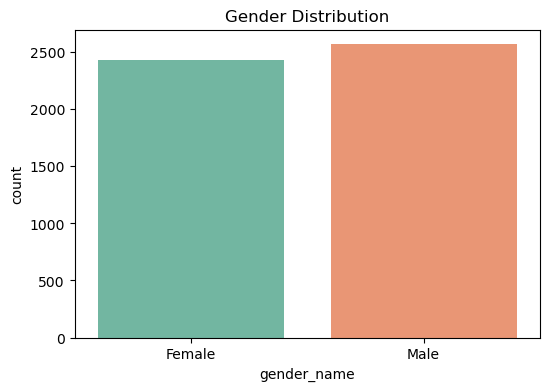

In [15]:
# Distribution of gender

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gender_name', palette='Set2')
plt.title('Gender Distribution')
plt.show()

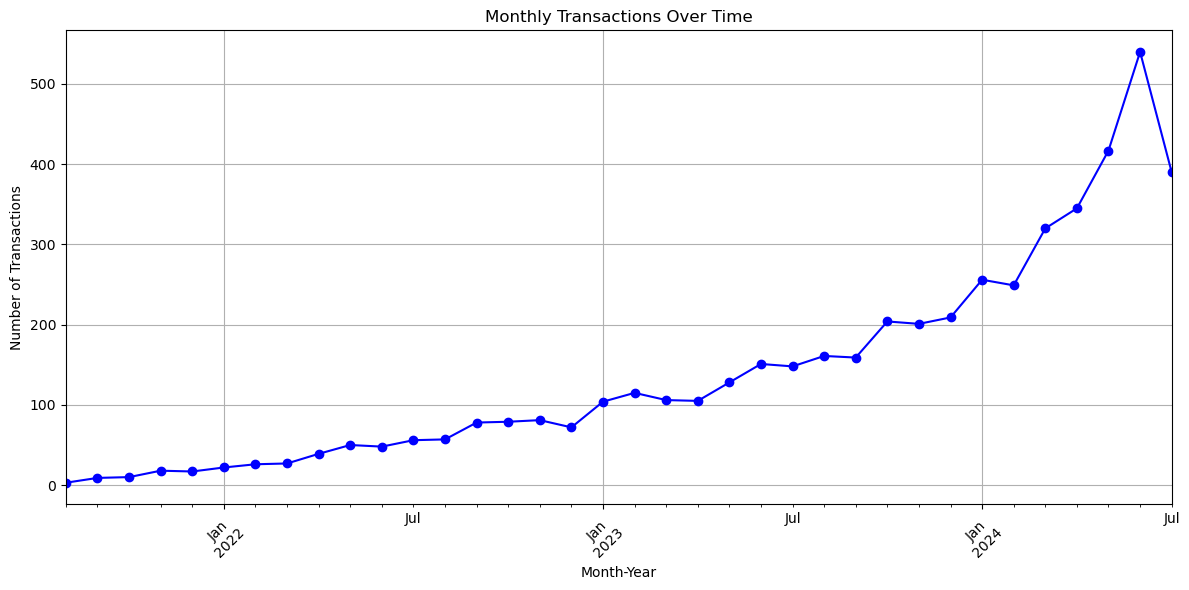

In [16]:
plt.figure(figsize=(12, 6))
monthly_trends = data.groupby(data['transaction_date'].dt.to_period('M')).size()
monthly_trends.plot(kind='line', marker='o', color='b')
plt.title("Monthly Transactions Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

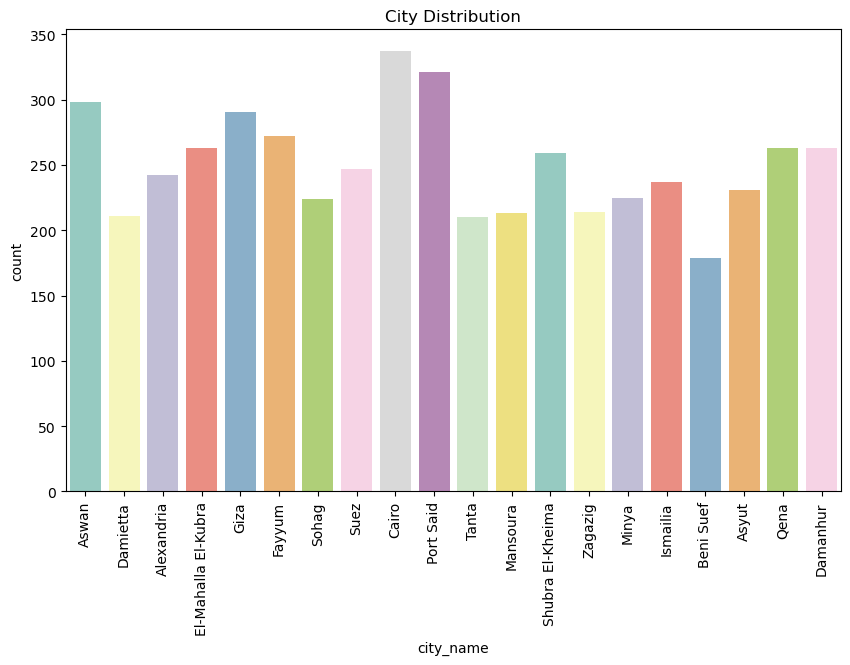

In [17]:
# Distribution of cities

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='city_name', palette='Set3')
plt.title('City Distribution')
plt.xticks(rotation=90)
plt.show()

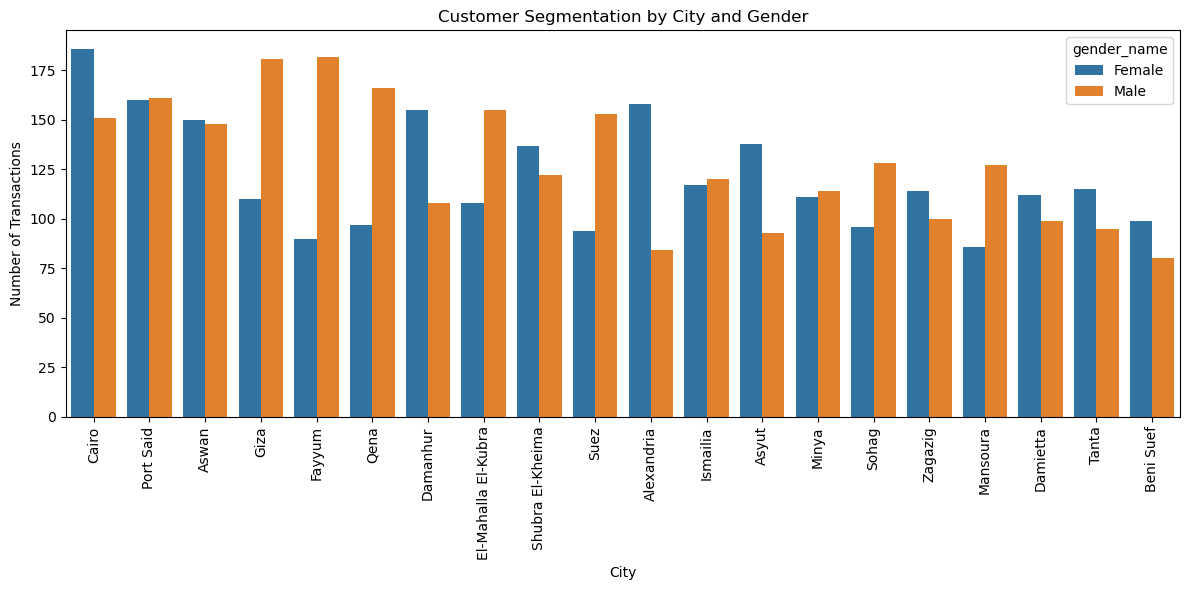

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city_name', hue='gender_name', data=data, order=data['city_name'].value_counts().index)
plt.title('Customer Segmentation by City and Gender')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

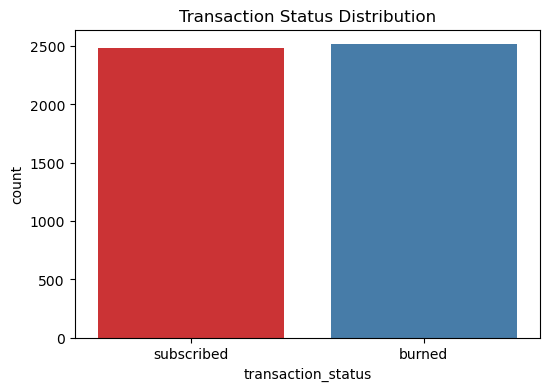

In [19]:
# Transaction status distribution

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='transaction_status', palette='Set1')
plt.title('Transaction Status Distribution')
plt.show()


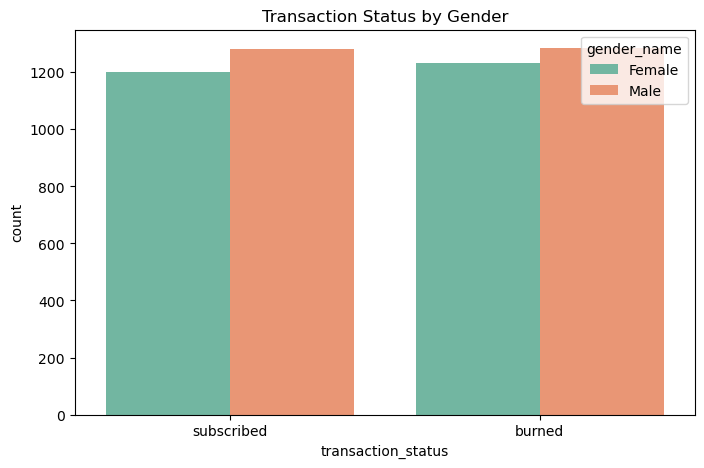

In [20]:
# The relationship between gender and transaction status

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='transaction_status', hue='gender_name', palette='Set2')
plt.title('Transaction Status by Gender')
plt.show()

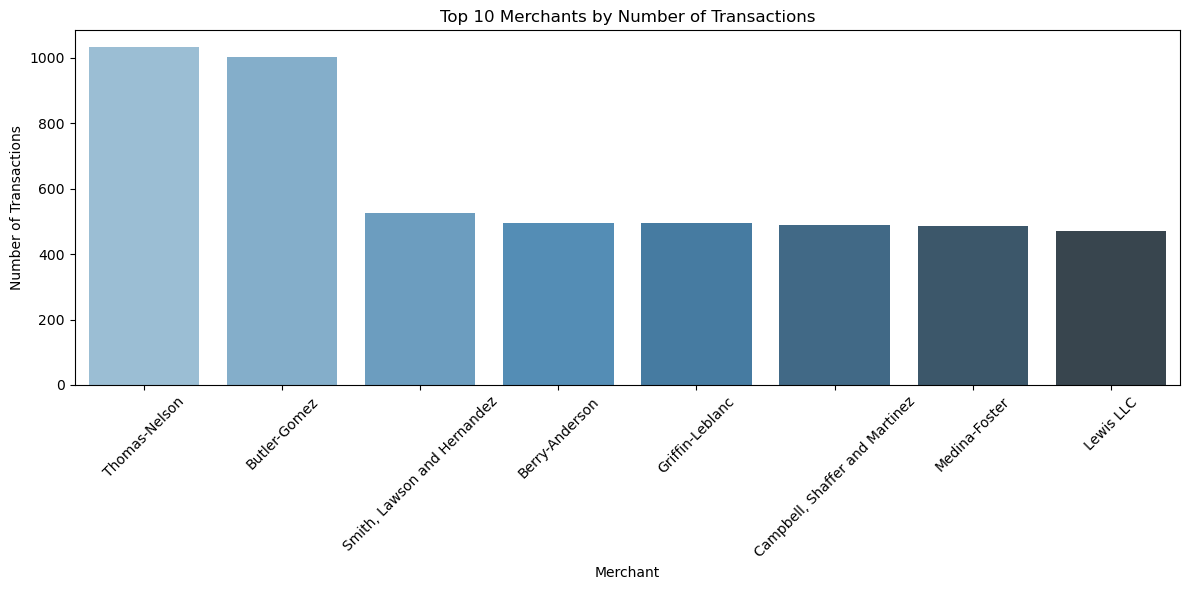

In [21]:
#Merchant Performance Analysis (Top 10 Merchants by Transaction Count)

plt.figure(figsize=(12, 6))
top_merchants = data['merchant_name'].value_counts().head(10)
sns.barplot(x=top_merchants.index, y=top_merchants.values, palette="Blues_d")
plt.title('Top 10 Merchants by Number of Transactions')
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

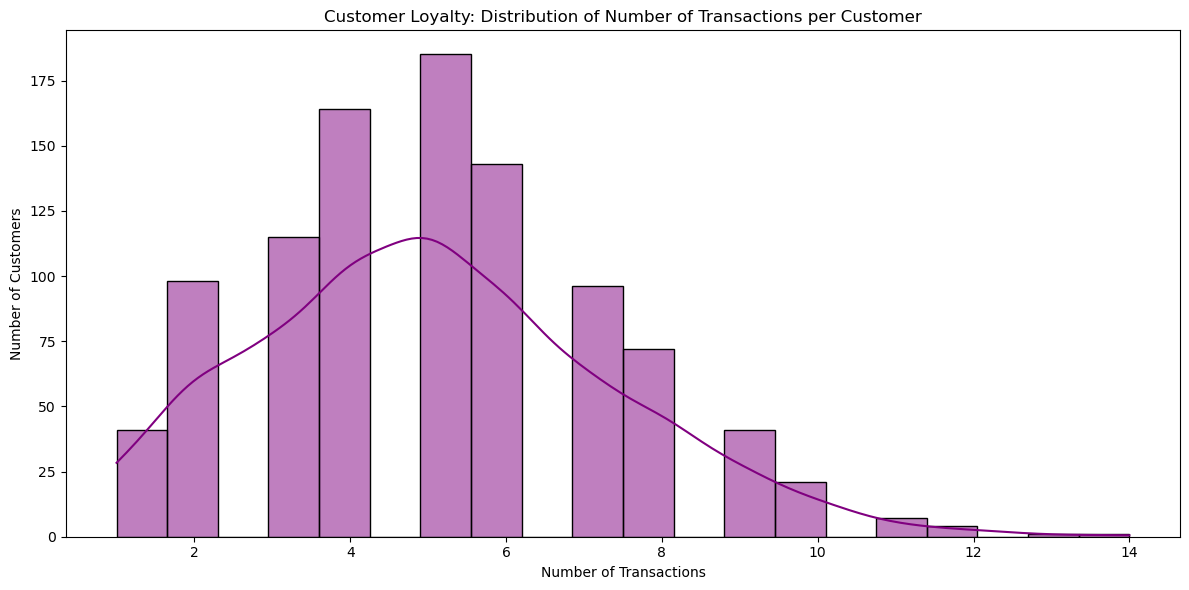

In [22]:
# Customer Loyalty Analysis
plt.figure(figsize=(12, 6))
customer_loyalty = data.groupby('customer_id').size()
sns.histplot(customer_loyalty, bins=20, kde=True, color='purple')
plt.title('Customer Loyalty: Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

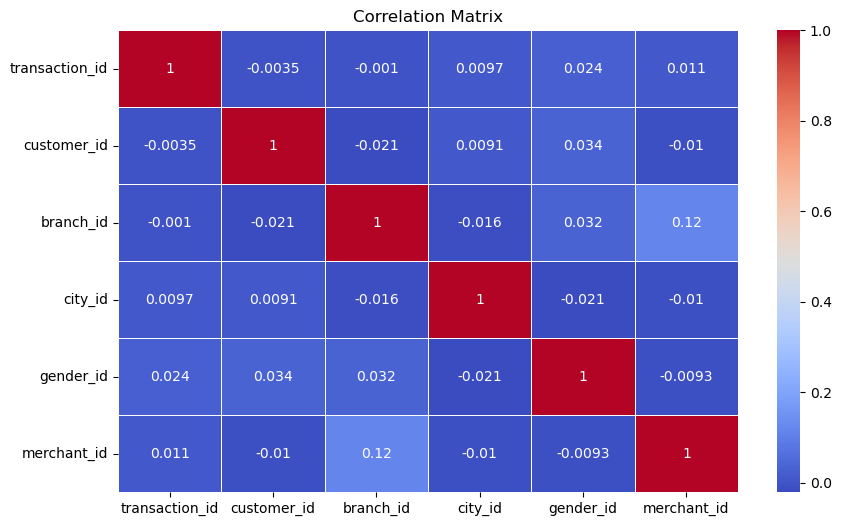

In [23]:
# Analyzing the correlation between numerical features

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

In [24]:
# Selecting relevant features for clustering (encode categorical variables)
features = data[['gender_name', 'city_name', 'transaction_status', 'coupon_name', 'merchant_name']]


In [25]:
# One-hot encoding of categorical features
features_encoded = pd.get_dummies(features, drop_first=True)

In [26]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# K-Means Clustering

In [27]:
# Trying different values of K (number of clusters)
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    
    inertia.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

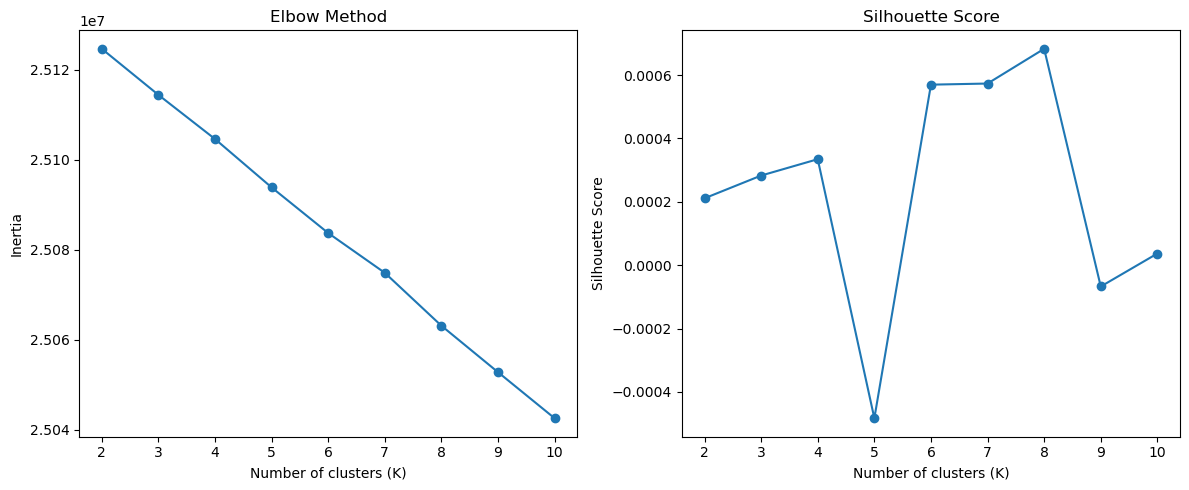

In [28]:
# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Optimal K and Final Model Training

In [29]:
optimal_k = 4
# Train the final K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

Segment Analysis 

In [30]:
# Analyzing each cluster
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    print(f"\nCluster {cluster} Summary:")
    print(cluster_data.describe(include='all'))
    print("\n")


Cluster 0 Summary:
        transaction_id  customer_id     transaction_date transaction_status  \
count       480.000000    480.00000                  480                480   
unique             NaN          NaN                  328                  2   
top                NaN          NaN  2024-06-24 00:00:00             burned   
freq               NaN          NaN                    5                242   
first              NaN          NaN  2021-09-01 00:00:00                NaN   
last               NaN          NaN  2024-07-14 00:00:00                NaN   
mean       2380.193750    539.91875                  NaN                NaN   
std        1465.981033    287.22449                  NaN                NaN   
min           7.000000      1.00000                  NaN                NaN   
25%        1126.500000    304.50000                  NaN                NaN   
50%        2250.500000    572.50000                  NaN                NaN   
75%        3673.750000    783.50

In [31]:
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    print(f"\nCluster {cluster} KPIs:")
    print(f"Number of Customers: {cluster_data.shape[0]}")
    print(f"Average Coupon Usage: {cluster_data['coupon_name'].value_counts().mean()}")  
    print(f"Top Cities: {cluster_data['city_name'].value_counts().head()}")
    print(f"Top Genders: {cluster_data['gender_name'].value_counts().head()}")
    print("\n")


Cluster 0 KPIs:
Number of Customers: 480
Average Coupon Usage: 1.0
Top Cities: Qena         34
Damanhur     32
Suez         32
Tanta        32
Port Said    32
Name: city_name, dtype: int64
Top Genders: Male      254
Female    226
Name: gender_name, dtype: int64



Cluster 1 KPIs:
Number of Customers: 224
Average Coupon Usage: 1.0
Top Cities: Sohag    224
Name: city_name, dtype: int64
Top Genders: Male      128
Female     96
Name: gender_name, dtype: int64



Cluster 2 KPIs:
Number of Customers: 3137
Average Coupon Usage: 1.0
Top Cities: Port Said    289
Aswan        214
Giza         208
Damanhur     188
Fayyum       187
Name: city_name, dtype: int64
Top Genders: Male      1594
Female    1543
Name: gender_name, dtype: int64



Cluster 3 KPIs:
Number of Customers: 1159
Average Coupon Usage: 1.0
Top Cities: Cairo               337
Giza                 60
Minya                58
Shubra El-Kheima     58
Alexandria           56
Name: city_name, dtype: int64
Top Genders: Male      591
Female